# 課題8

そのまま課題ファイルで編集しないでください。課題ファイルを複製してから課題を回答してください。

In [5]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/lvzeyu/css_tohoku/master/css_tohoku/draft/Data/titanic.csv")

In [3]:
import matplotlib.pyplot as plt

In [6]:
# 1. データの最初の5行を表示 (概要把握に便利)
print("データの先頭5行:")
print(df.head())

# 2. 各列のデータ型、欠損値の数、メモリ使用量などの情報を表示
print("\nデータの基本情報:")
df.info()

# 3. 数値列の統計情報を表示 (平均、中央値、最大値など)
print("\n数値列の統計情報:")
print(df.describe())

# 4. 列名の一覧を表示
print("\n列名の一覧:")
print(df.columns)

# 5. データフレームの形状（行数、列数）を表示
print("\nデータの形状 (行数, 列数):")
print(df.shape)

# 6. 各列の欠損値の数を表示
print("\n各列の欠損値の数:")
print(df.isnull().sum())

データの先頭5行:
   pclass                                             name     sex      age  \
0     1.0                    Allen, Miss. Elisabeth Walton  female  29.0000   
1     1.0                   Allison, Master. Hudson Trevor    male   0.9167   
2     1.0                     Allison, Miss. Helen Loraine  female   2.0000   
3     1.0             Allison, Mr. Hudson Joshua Creighton    male  30.0000   
4     1.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0000   

   sibsp  parch  ticket      fare    cabin embarked boat   body  \
0    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  survived  
0                     St Louis, MO         1  
1  Montreal, PQ / 

## 課題1

以下の図を再現してください

- 年齢の分布を、異なる階級幅を使って、4つのサブプロットをわけて描画する
   - 階級幅を適当で決めてよい
- 各サブプロットには、
    - x軸ラベル、y軸ラベル、サブプロット番号(a-d)を指定する
    - 水平方向のグリッド線を追加する
    - ヒストグラムの色を`lightblue`に変更する

![](./Figure1.png)

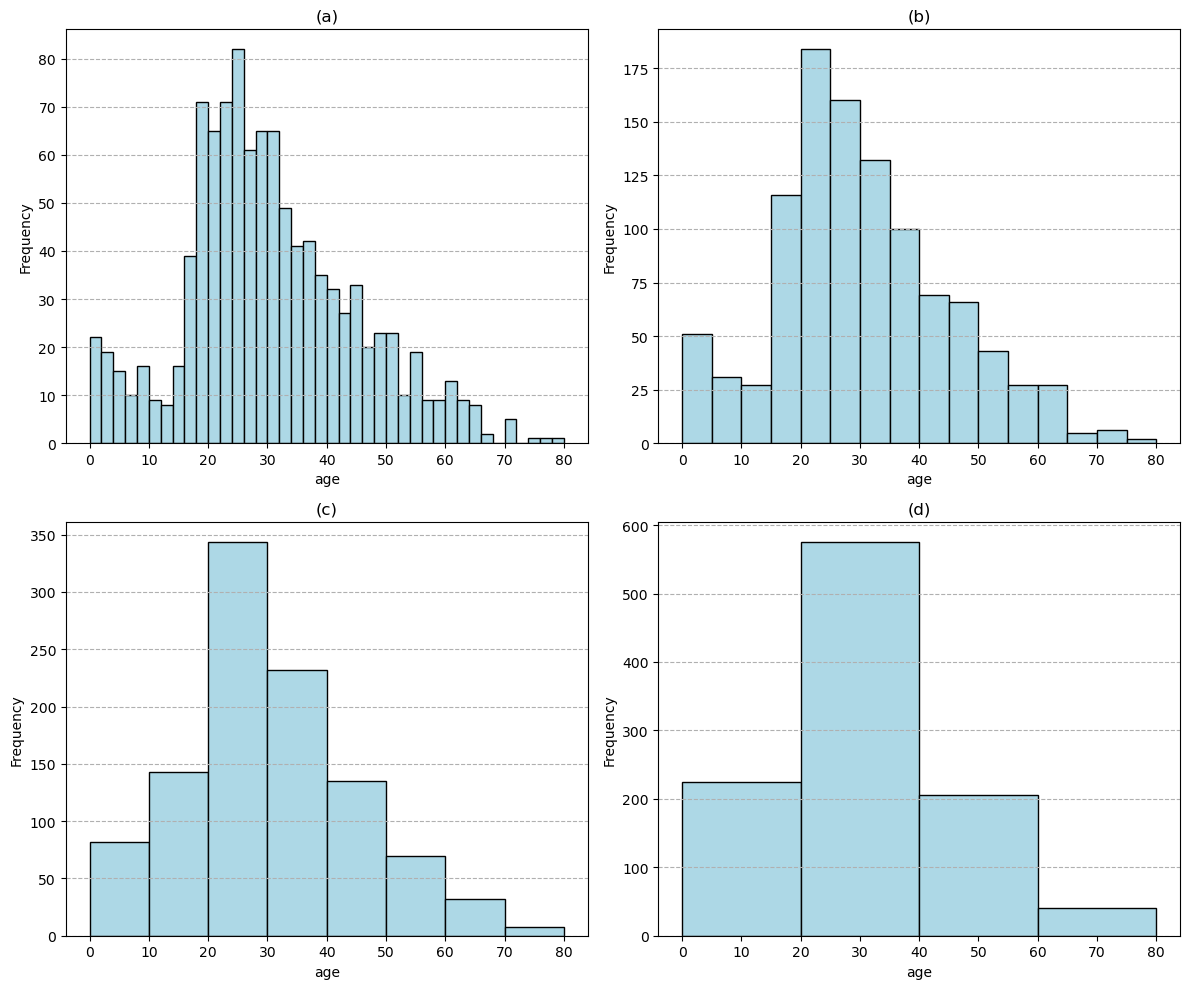

In [13]:
# 課題1: 
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
bin_widths = [2, 5, 10, 20]


titles = ['(a)', '(b)', '(c)', '(d)']

for i, ax in enumerate(axes):
    age_min = df['age'].min()
    age_max = df['age'].max()
    bins = range(int(age_min), int(age_max) + bin_widths[i], bin_widths[i])
    ax.hist(df['age'].dropna(), bins=bins, color='lightblue', edgecolor='black')
    ax.set_xlabel('age')
    ax.set_ylabel('Frequency')
    ax.set_title(titles[i])
    ax.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

## 課題2

以下の図を再現してください

- 男性乗客と女性乗客の年齢の分布をそれぞれ描画する
- 全乗客の年齢分布を示す灰色ヒストグラムも描画する
- 図のタイトル、x軸ラベル、y軸ラベル、凡例を設定する

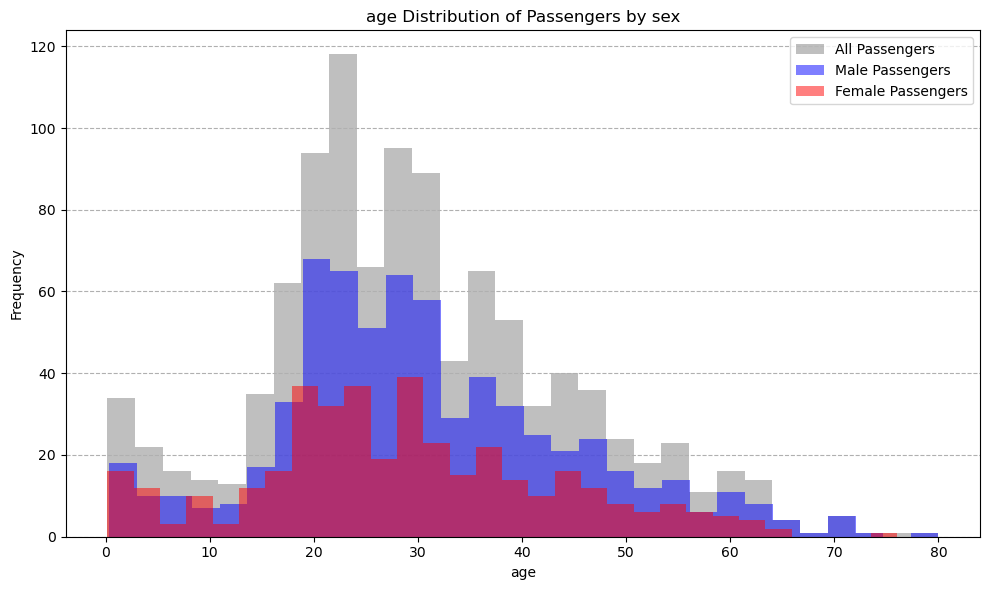

In [14]:
# 課題2: 
plt.figure(figsize=(10, 6))

plt.hist(df['age'].dropna(), bins=30, color='gray', alpha=0.5, label='All Passengers', zorder=1)

male_age = df[df['sex'] == 'male']['age'].dropna()
plt.hist(male_age, bins=30, color='blue', alpha=0.5, label='Male Passengers', zorder=2)

female_age = df[df['sex'] == 'female']['age'].dropna()
plt.hist(female_age, bins=30, color='red', alpha=0.5, label='Female Passengers', zorder=2)

plt.title('age Distribution of Passengers by sex')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


![](./Figure2.png)